In [108]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv("project_2.csv")
df.head(9)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0      1       1  
6    0      2       1  
7    0      3       1  
8    0      3       1

# Data Visualization and Analysis


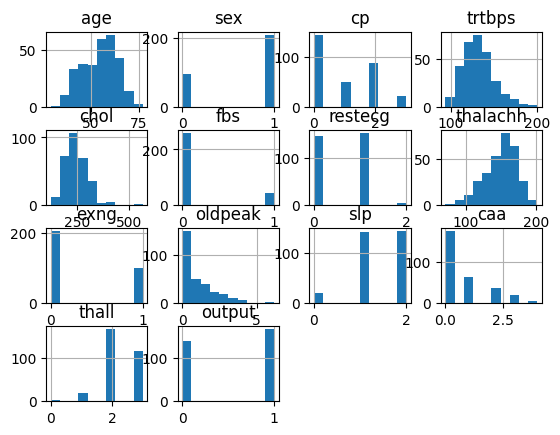

In [110]:
df.hist()
plt.show()

In [111]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [112]:
X = df[['age', 'sex','cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp','caa' , 'thall']] .values  #.astype(float)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [113]:
y = df['output'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


In [114]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
         1.09, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
         2.12, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
         0.31,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.21,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.38,  0.98, -0.71, -0.51]])

#### Let's look at the distribution of the classes based on some features:

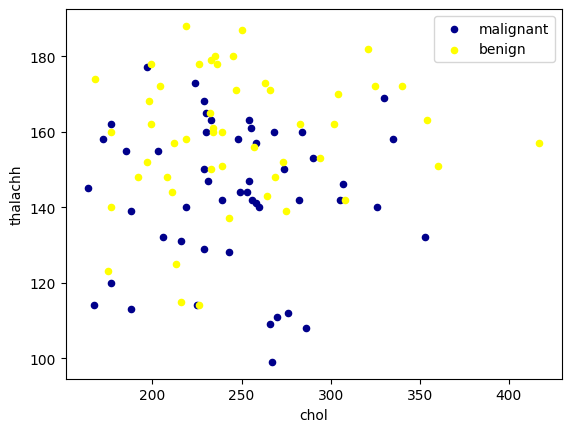

In [115]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='chol', y='thalachh', color='DarkBlue', label='malignant');
df[df['output'] == 1][0:50].plot(kind='scatter', x='chol', y='thalachh', color='Yellow', label='benign', ax=ax);
plt.show()

In [116]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='trtbps', y='fbs', color='DarkBlue', label='malignant');
df[df['output'] == 1][0:50].plot(kind='scatter', x='trtbps', y='fbs', color='Yellow', label='benign', ax=ax);
plt.show()

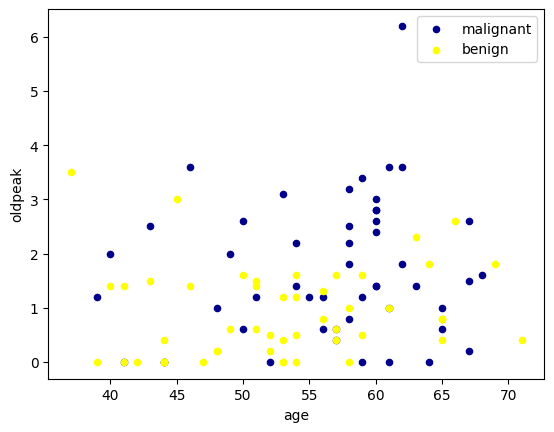

In [117]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='oldpeak', color='DarkBlue', label='malignant');
df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='oldpeak', color='Yellow', label='benign', ax=ax);
plt.show()

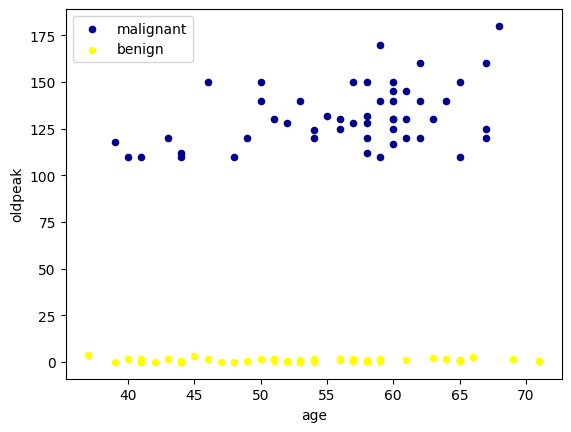

In [118]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='trtbps', color='DarkBlue', label='malignant');
df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='oldpeak', color='Yellow', label='benign', ax=ax);
plt.show()

## Train/Test dataset

In [119]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# First method: Support Vector Machine

#### I checked polynomial, rbf, sigmoid, linear kernels and the linear kernel has the best result.

In [120]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear') 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [121]:
y_hat = clf.predict(X_test)
y_hat [0:5]

array([1, 0, 0, 1, 1], dtype=int64)

In [122]:
y_test[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [124]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[23  2]
 [ 4 32]]


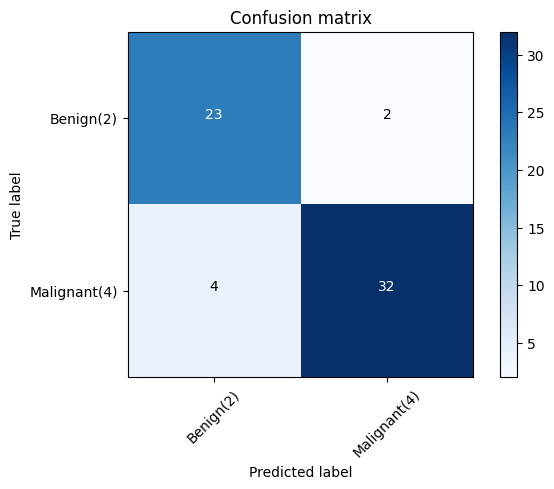

In [125]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [126]:
from sklearn.metrics import f1_score
print('f1+score: ',f1_score(y_test, y_hat, average='weighted'))
from sklearn.metrics import jaccard_score
print('jacard index: ',jaccard_score(y_test, y_hat,pos_label=0))

f1+score:  0.9021257431093496
jacard index:  0.7931034482758621


# Second Method: k-nearest neighbors

In [127]:
from sklearn.neighbors import KNeighborsClassifier

### traning and pridict for k=5

In [128]:
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [129]:
y_test[0:5]

array([1, 0, 1, 1, 0], dtype=int64)

#### check accuracy evaliuation

In [130]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.871900826446281
Test set Accuracy:  0.8032786885245902


##  check for other k

In [131]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77, 0.77, 0.8 , 0.8 , 0.8 , 0.82, 0.84, 0.82, 0.82, 0.85, 0.82,
       0.84, 0.82, 0.84])

#### Plot the model accuracy for a different number of neighbors and find the best accuracy.

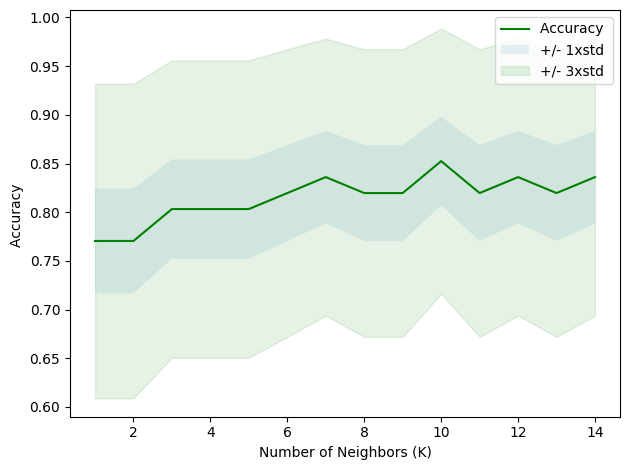

The best accuracy was with 0.8524590163934426 with k= 10


In [132]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [133]:
print('jacard index : ', jaccard_score(y_test, yhat,pos_label=0))
print (classification_report(y_test, yhat))
from sklearn.metrics import log_loss
print('log loss :', log_loss(y_test, yhat_prob))
print('f1+score: ',f1_score(y_test, y_hat, average='weighted'))

jacard index :  0.6875
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

log loss : 0.4363789674264379
f1+score:  0.8042514862186994


# Third Method: Logistic Regresion

## Modeling

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

## predict

In [135]:
y_hat = LR.predict(X_test)
print(y_hat)

yhat_prob = LR.predict_proba(X_test)
yhat_prob

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]


array([[0.38, 0.62],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.4 , 0.6 ],
       [0.5 , 0.5 ],
       [0.63, 0.37],
       [0.23, 0.77],
       [0.49, 0.51],
       [0.37, 0.63],
       [0.43, 0.57],
       [0.2 , 0.8 ],
       [0.39, 0.61],
       [0.57, 0.43],
       [0.33, 0.67],
       [0.86, 0.14],
       [0.29, 0.71],
       [0.29, 0.71],
       [0.68, 0.32],
       [0.46, 0.54],
       [0.24, 0.76],
       [0.39, 0.61],
       [0.81, 0.19],
       [0.46, 0.54],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.59, 0.41],
       [0.23, 0.77],
       [0.44, 0.56],
       [0.81, 0.19],
       [0.58, 0.42],
       [0.5 , 0.5 ],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.41, 0.59],
       [0.48, 0.52],
       [0.83, 0.17],
       [0.8 , 0.2 ],
       [0.69, 0.31],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.26, 0.74],
       [0.41, 0.59],
       [0.74, 0.26],
       [0.53,

## confusion matrix

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[29  7]
 [ 3 22]]


Confusion matrix, without normalization
[[29  7]
 [ 3 22]]


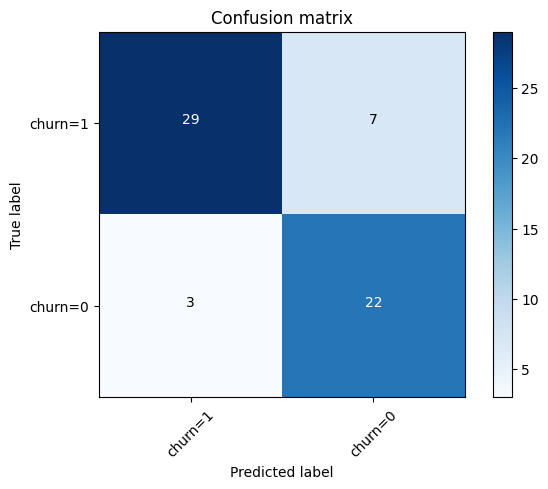

In [137]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

## evaluation with some metrics

In [138]:
print('jacard index : ', jaccard_score(y_test, yhat,pos_label=0))
print (classification_report(y_test, yhat))
print('log loss :', log_loss(y_test, yhat_prob))
print('f1+score: ',f1_score(y_test, y_hat, average='weighted'))

jacard index :  0.6875
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61

log loss : 0.4363789674264379
f1+score:  0.8848609284270637


# Result

#### the support vector machine(svm) has the best accuracy and f1_score and the other metrics